--------------------------------------------


# Parameters Distributions

The first function is legwork.source.Source.plot_source_variables() which can create either 1D or 2D distributions of any subpopulation of sources.

Let’s take it for a spin with a collection of stationary binaries.



In [3]:
from GravitationalWaves import source, utils, visualization
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [13]:
# create a random collection of sources
n_values = 15000
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.normal(8, 1.5, n_values) * u.kpc
f_orb = 10**(np.random.normal(-5, 0.5, n_values)) * u.Hz
ecc = 1 - np.random.power(3, n_values)

sources = source.Source(m_1=m_1, m_2=m_2, ecc=ecc, dist=dist, f_orb=f_orb)

This function will let you plot any of several parameters (listed in the table below) and work out the units for the axes labels automatically based on the values in the source class.


We can start simple and just plot the orbital frequency distribution for all sources.


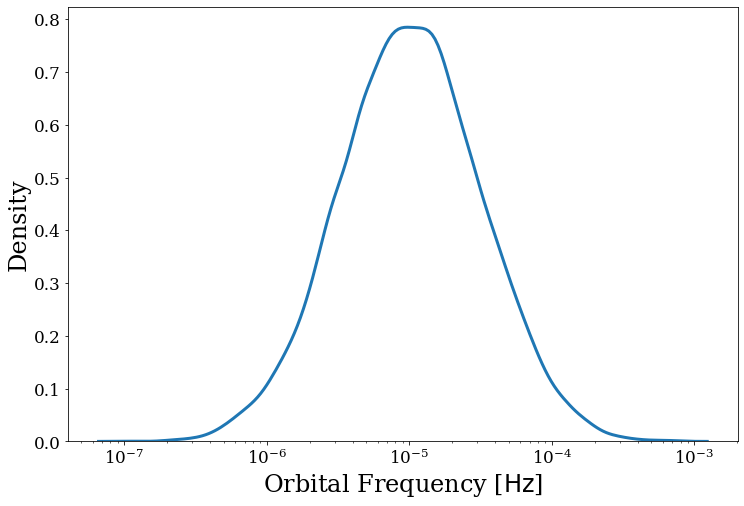

In [14]:
fig, ax = sources.plot_source_variables(xstr="f_orb", disttype="kde", log_scale=True, linewidth=3)

But we could also try to see how the detectable population is different from the entire population. Let’s create two frequency KDEs, one for the detectable binaries and another for all of them. For this we will use the which_sources parameter and pass a mask on the SNR.

Calculating SNR for 15000 sources
	0 sources have already merged
	15000 sources are stationary
		2786 sources are stationary and circular
		12214 sources are stationary and eccentric


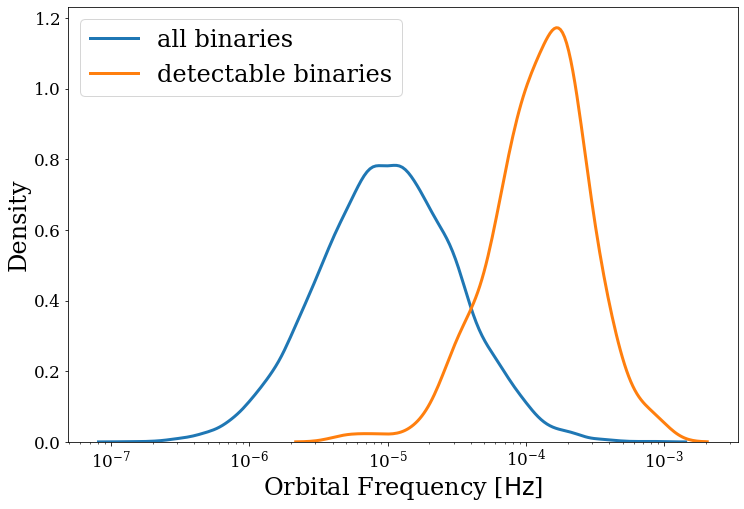

In [40]:
# calculate the SNR
snr = sources.get_snr(verbose=True)

# mask detectable binaries
detectable = snr > 7

# plot all binaries
fig, ax = sources.plot_source_variables(xstr="f_orb", disttype="kde", log_scale=True, linewidth=3,
                                        show=False, label="all binaries")

# plot all binaries
fig, ax = sources.plot_source_variables(xstr="f_orb", disttype="kde", log_scale=True, linewidth=3, fig=fig,
                                        ax=ax, which_sources=detectable, label="detectable binaries",
                                        show=False)

ax.legend()

plt.show()

Here’s we can see that the distribution is shifted to higher frequencies for detectable binaries which makes sense since these are easier to detect.